# PRODIGY_GA_02

## Installing dependencies
Here, the libraries needed for image generation are installed:

- **Diffusers** → provides Stable Diffusion pipelines  
- **Transformers** → supports pre‑trained generative models like DALL‑E‑mini  
- **Torch** → deep learning backend  
- **Accelerate & Safetensors** → optimize model loading and inference  
- **Matplotlib** → visualization of generated images


In [ ]:
!pip install diffusers transformers accelerate safetensors torch matplotlib


## Loading pre-trained model
Here the Stable Diffusion model is loaded from Hugging Face.  
It uses GPU if available for faster image generation.


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"

# Load the model in half precision (faster on GPU)
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

# Use GPU if available, otherwise fall back to CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)

print("Running on:", device)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Running on: cuda


In [ ]:
# Load Stable Diffusion model from Hugging Face
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, dtype=torch.float32)
pipe = pipe.to("cpu")


Keyword arguments {'dtype': torch.float32} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Preparing prompts
Here a small text file with sample prompts is created.  
Later, this can be replaced with a larger curated dataset.


In [ ]:
import os
os.makedirs("data", exist_ok=True)

sample_prompts = """
A futuristic city skyline at sunset
A cute puppy wearing a superhero costume
An astronaut riding a horse in space
A fantasy castle surrounded by waterfalls
A cyberpunk street market at night
"""
with open("data/prompts.txt", "w") as f:
    f.write(sample_prompts.strip())

with open("data/prompts.txt", "r") as f:
    prompts = [line.strip() for line in f.readlines() if line.strip()]

print("Loaded prompts:", prompts)


Loaded prompts: ['A futuristic city skyline at sunset', 'A cute puppy wearing a superhero costume', 'An astronaut riding a horse in space', 'A fantasy castle surrounded by waterfalls', 'A cyberpunk street market at night']


## Generating images
Here the model generates images for each prompt and saves them into a results folder.


In [ ]:
os.makedirs("results/samples", exist_ok=True)

for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]
    image.save(f"results/samples/output_{i+1}.png")
    print(f"Generated image saved: output_{i+1}.png")


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved: output_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved: output_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved: output_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved: output_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved: output_5.png


## Visualizing results
Here the generated images are displayed using Matplotlib.


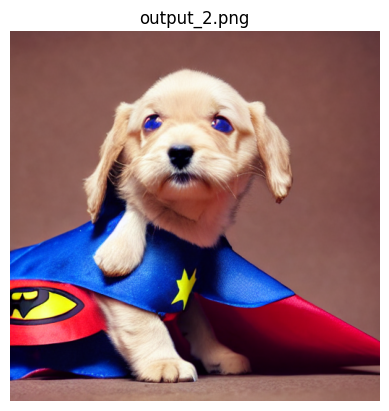

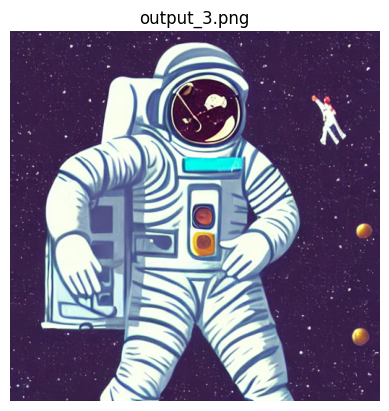

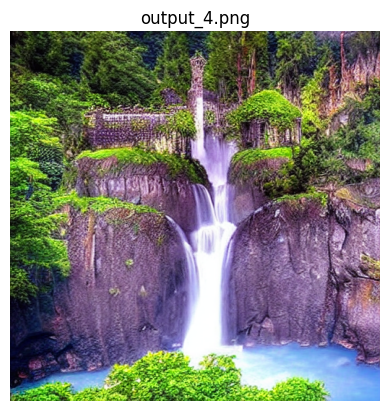

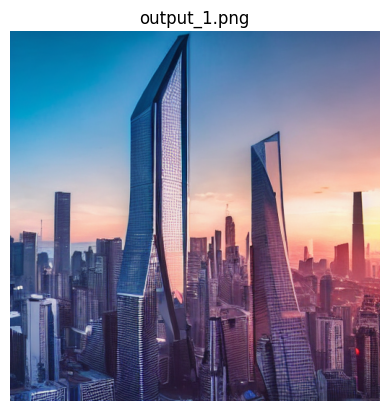

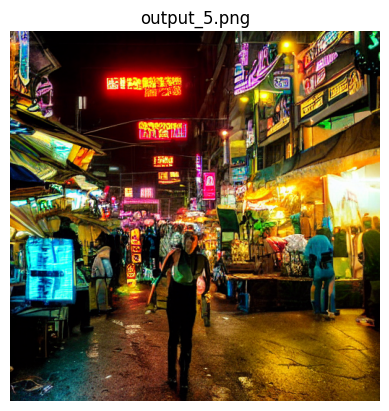

In [ ]:
import matplotlib.pyplot as plt

for file in os.listdir("results/samples"):
    img = plt.imread(os.path.join("results/samples", file))
    plt.imshow(img)
    plt.axis("off")
    plt.title(file)
    plt.show()
